In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import json
EXPERT_PATH = ['..\\research\data_expert_demo.h5', "..\\research\data_expert_demo_17_1.h5","..\\research\data_expert_demo_3.h5","..\\research\data_expert_demo_4.h5"]

In [194]:


combined_df = pd.DataFrame()  # Create an empty DataFrame to store the combined data

for path in EXPERT_PATH:
    try:
        data = pd.read_hdf(path)
        combined_df = pd.concat([combined_df, data])  # Concatenate the current file's data to the combined DataFrame
    except FileNotFoundError:
        print('File {} not found'.format(path))


expert_data =combined_df
type(expert_data)

pandas.core.frame.DataFrame

In [195]:

from sklearn.model_selection import train_test_split

# Assuming 'expert_data' is your pandas DataFrame

# Sort the data by 'midi_filename' and 'username' columns
expert_data = expert_data.sort_values(by=['midi_filename', 'username'])

# Group the data by 'midi_filename' and 'username'
grouped_data = expert_data.groupby(['midi_filename', 'username'])

train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Iterate over each group
for group_key, group_df in grouped_data:
    # Check the number of points in the group
    group_size = len(group_df)

    if group_size > 1:
        # Split the group into train and test
        train_group, test_group = train_test_split(group_df, test_size=1, shuffle=False)

        # Append train group to train data
        train_data = pd.concat([train_data, train_group])

        # Append test group to test data
        test_data = pd.concat([test_data, test_group])
    else:
        # Add the whole group to the training data
        train_data = pd.concat([train_data, group_df])

# Randomly choose a third of the points in test and move them to train
test_size = len(test_data)
num_points_to_move = test_size // 3

if num_points_to_move > 0:
    random_indices = test_data.sample(n=num_points_to_move).index
    train_data = pd.concat([train_data, test_data.loc[random_indices]])
    test_data = test_data.drop(random_indices)

# Reset the index of train and test data
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)




In [196]:
whole_data = expert_data.copy()
expert_data = train_data


In [197]:
test_data.head()

,midi_filename,username,practice_mode,bpm,error_before_left_timing,error_before_right_timing,error_before_left_pitch,error_before_right_pitch,error_after_left_timing,error_after_right_timing,error_after_left_pitch,error_after_right_pitch
0,74a_HaKovaSheli.midi,lali_expert_01,IMP_PITCH,85.0,0.0,0.025760,0.0,0.020833,0.0,0.021342,0.0,0.000000
1,74a_HaKovaSheli.midi,t_3,IMP_PITCH,85.0,0.0,0.241550,0.0,0.395833,0.0,0.203962,0.0,0.270833
2,77a_YomHuledetSameach.midi,a_3,IMP_PITCH,85.0,0.0,0.140154,0.0,0.395833,0.0,0.026706,0.0,0.000000
3,77a_YomHuledetSameach.midi,lali_expert_02,IMP_PITCH,85.0,0.0,0.167096,0.0,0.291667,0.0,0.022326,0.0,0.000000
4,86b_EmekHanaharHaadom.midi,elad_demo_02,IMP_PITCH,85.0,0.0,0.021995,0.0,0.031250,0.0,0.024034,0.0,0.000000


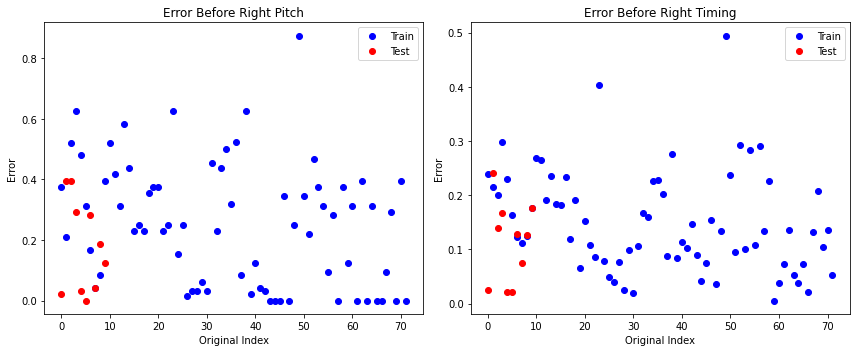

In [198]:
# Plot 'error_before_right_pitch' for train and test data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Error Before Right Pitch')
plt.plot(train_data.index, train_data['error_before_right_pitch'], 'bo', label='Train')
plt.plot(test_data.index, test_data['error_before_right_pitch'], 'ro', label='Test')

# Add labels and legends for the first plot
plt.xlabel('Original Index')
plt.ylabel('Error')
plt.legend()

# Plot 'error_before_right_timing' for train and test data
plt.subplot(1, 2, 2)
plt.title('Error Before Right Timing')
plt.plot(train_data.index, train_data['error_before_right_timing'], 'bo', label='Train')
plt.plot(test_data.index, test_data['error_before_right_timing'], 'ro', label='Test')

# Add labels and legends for the second plot
plt.xlabel('Original Index')
plt.ylabel('Error')
plt.legend()

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

In [199]:
expert_data.head()

,midi_filename,username,practice_mode,bpm,error_before_left_timing,error_before_right_timing,error_before_left_pitch,error_before_right_pitch,error_after_left_timing,error_after_right_timing,error_after_left_pitch,error_after_right_pitch
0,74a_HaKovaSheli.midi,a_2,IMP_PITCH,85.0,0.0,0.240111,0.0,0.375000,0.0,0.214765,0.0,0.208333
1,74a_HaKovaSheli.midi,a_2,IMP_PITCH,85.0,0.0,0.214765,0.0,0.208333,0.0,0.200346,0.0,0.520833
2,74a_HaKovaSheli.midi,a_2,IMP_PITCH,85.0,0.0,0.200346,0.0,0.520833,0.0,0.297872,0.0,0.625000
3,74a_HaKovaSheli.midi,a_2,IMP_PITCH,85.0,0.0,0.297872,0.0,0.625000,0.0,0.230774,0.0,0.479167
4,74a_HaKovaSheli.midi,a_2,IMP_PITCH,85.0,0.0,0.230774,0.0,0.479167,0.0,0.163820,0.0,0.312500


In [200]:
import enum
import random
import numpy as np

import GPy
import GPyOpt
from GPyOpt.methods import BayesianOptimization


class PracticeMode(enum.Enum):
    """
    All possible practice modes
    """
    IMP_PITCH = 0
    IMP_TIMING = 1
    LEFT = 2
    RIGHT = 3


# interval of possible bpm_values
BPM_BOUNDS = [50, 200]
class GaussianProcess:
    def __init__(self, bpm_norm_fac=100):
        self.data_X = None
        self.data_X_old_shape = None

        self.data_Y = None

        self.bpm_norm_fac = bpm_norm_fac

        self.domain = [
            {'name': 'practice_mode', 'type': 'categorical', 'domain': (0, 1, 2, 3)},
            {'name': 'bpm', 'type': 'continuous', 'domain':
                (self._norm_bpm(BPM_BOUNDS[0]), self._norm_bpm(BPM_BOUNDS[1]))},
            {'name': 'error_pitch_left', 'type': 'continuous', 'domain': (0, 1)},
            {'name': 'error_pitch_right', 'type': 'continuous', 'domain': (0, 1)},
            {'name': 'error_timing_left', 'type': 'continuous', 'domain': (0, 1)},
            {'name': 'error_timing_right', 'type': 'continuous', 'domain': (0, 1)}
        ]

        self.space = GPyOpt.core.task.space.Design_space(self.domain)

    def _norm_bpm(self, v: float) -> float:
        return v / self.bpm_norm_fac

    def _params2domain(self, error, bpm: int, practice_mode: PracticeMode):
        domain_x = [
            practice_mode.value,
            self._norm_bpm(bpm),
            error['pitch_left'],
            error['pitch_right'],
            error['timing_left'],
            error['timing_right']
        ]

        return np.array([domain_x])

    def _domain2space(self, domain_x):
        # Converts the domain variables into the GPs input space
        # does one-hot encoding
        space_rep = self.space.unzip_inputs(domain_x)
        return space_rep

    def _get_bayes_opt(self) -> BayesianOptimization:
        return self.bayes_opt

    def update_model(self):
        """
        If the Gaussian Process' training data has changed, "trains" the GP on the complete data set.
        """
        if self.data_X is None or self.data_X.shape == self.data_X_old_shape:
            return

        self.data_X_old_shape = self.data_X.shape

        kernel = GPy.kern.RBF(input_dim=self.space.model_dimensionality,
                              variance=0.01,
                              lengthscale=1)

        self.bayes_opt = GPyOpt.methods.BayesianOptimization(
            f=None, domain=self.domain, X=self.data_X, Y=self.data_Y,
            maximize=True, normalize_Y=False,
            kernel=kernel,
        )

        self.bayes_opt.model.max_iters = 0
        self.bayes_opt._update_model()

        self.bayes_opt.model.max_iters = 1000
        self.bayes_opt._update_model()

    def get_estimate(self, error, bpm, practice_mode: PracticeMode) -> float:
        """
        Estimates the utility value for a given practice mode
        @param error: error values
        @param bpm: bpm of the music piece
        @param practice_mode: the practice mode for which the utility value should be estimated
        @return: gaussian process' estimate of the utility value
        """
        if not hasattr(self, "bayes_opt"):
            # if there is no model yet, e.g. in the first iteration return random utility
            return random.random()

        bayes_opt = self._get_bayes_opt()

        x = self._params2domain(error, bpm, practice_mode)
        x = self._domain2space(x)

        mean, var = bayes_opt.model.predict(x)

        return mean[0]

    def get_best_practice_mode(self, error, bpm, epsilon=0):
        """
        computes the gaussian process' estimate of the best practice mode
        currently utilizes epsilon-greedy exploration
        @param error: error values
        @param bpm: bpm of the music piece
        @param (optional) epsilon: the probability of making a random decision. set to 0 for no exploration.
        @return: chosen for given input parameters PracticeMode
        """
        left = False
        right = True
        if left and right:
            all_practice_modes = list(PracticeMode)
        else:
            all_practice_modes = [PracticeMode.IMP_PITCH, PracticeMode.IMP_TIMING]
        # epsilon-greedy
        if random.random() > epsilon:
            max_i = np.argmax([self.get_estimate(error, bpm, pm)
                               for pm in all_practice_modes])
            return all_practice_modes[max_i]
        else:
            return np.random.choice(all_practice_modes)

    def add_data_point(self, error, bpm: int, practice_mode: PracticeMode,
                       utility_measurement: float):
        """
        Adds a new datapoint to the dataset of the gaussian process.
        Does not update the Gaussian Process for the new training data (see: update_model)
        @param error: error values
        @param bpm: bpm of the music piece
        @param practice_mode: practice mode in which the performer practiced
        @param utility_measurement: observed utility value for the given parameters
        """

        new_x = self._params2domain(error, bpm, practice_mode)
        new_y = [utility_measurement]

        if self.data_X is None:
            self.data_X = new_x
            self.data_Y = np.array([new_y])
        else:
            self.data_X = np.vstack((self.data_X, new_x[0]))
            self.data_Y = np.vstack((self.data_Y, new_y[0]))
            
    def update_model_with_kernel(self, kernel):
    #it seems possible to enter the kernel to the functionality...

        ## only calculate new model if data changed
        if self.data_X is None or self.data_X.shape == self.data_X_old_shape:
            return
        
        
        self.data_X_old_shape = self.data_X.shape
        
        
        
        self.bayes_opt = GPyOpt.methods.BayesianOptimization(
            f = None, domain = self.domain, X = self.data_X, Y = self.data_Y,
            maximize=True,
            kernel=kernel,
        )
        
        self.bayes_opt.model.max_iters = 0
        self.bayes_opt.update_model_with_kernel(kernel) 
        
        self.bayes_opt.model.model.kern.variance.constrain_bounded(0.2,1,
                                                                   warning=False)
        self.bayes_opt.model.model.kern.lengthscale.constrain_bounded(1, 2,
                                                                   warning=False)
        
        self.bayes_opt.model.max_iters = 1000
        self.bayes_opt.update_model_with_kernel(kernel) 
        
   
    
def compare_to_best_policy(policy_argmax, best_argmax, best_error_diff=1):
        num_diff_cases = np.sum(np.abs(policy_argmax-best_argmax))
    
        abs_diff = num_diff_cases / policy_argmax.shape[0]

    
        return abs_diff

In [201]:
def error_diff_to_utility_for_opt(error_pre_pitch, error_post_pitch, error_pre_timing, error_post_timing, a,MEAN_UTILITY):
    diff_timing = error_post_timing - error_pre_timing
    diff_pitch  = error_post_pitch  - error_pre_pitch
    return - (diff_timing*a + diff_pitch*(1-a)) - MEAN_UTILITY

In [202]:
def calc_ground_truth_utility(recorded_points,a,mean_utility):
    #calc utility for all expert data
    recorded_points["utility"] = recorded_points.apply(lambda row: error_diff_to_utility_for_opt(row["error_before_right_pitch"],
                                                                                row["error_after_right_pitch"],
                                                                                row["error_before_right_timing"],
                                                                                row["error_after_right_timing"],a, mean_utility), axis=1)
    return recorded_points  

In [203]:
def policy_diff_for_single_gp(gauss_model, recorded_points,a,mean_utility):
    #calculate the policy diff for a single gp, given the recorded points and the expert decision
    policy_diff = []
    practice_mode_map = {'IMP_PITCH': PracticeMode.IMP_PITCH, 'IMP_TIMING': PracticeMode.IMP_TIMING}
    #for all recorded data points
    recorded_points = calc_ground_truth_utility(recorded_points, a, mean_utility)
    for i, point in recorded_points.iterrows():

        #prepare the data in the right format for adding to the gp

        point_data = point.drop("utility")
        expert_opt_policy = point["utility"]
        bpm=point["bpm"]
        given_practice_mode = point["practice_mode"]
        expert_practice_mode = practice_mode_map[given_practice_mode]
        
        if expert_practice_mode == PracticeMode.IMP_PITCH:
            wrong_practice_mode = PracticeMode.IMP_TIMING
        else:
           wrong_practice_mode = PracticeMode.IMP_PITCH
       
        errors = {
    'pitch_left': point_data['error_before_left_pitch'],
    'pitch_right': point_data['error_before_right_pitch'],
    'timing_left': point_data['error_before_left_timing'],
    'timing_right': point_data['error_before_right_timing']}

        #add the data point to the gp- 
        #HERE we train the model using the a parameter
 
        gauss_model.add_data_point(errors ,bpm, expert_practice_mode, expert_opt_policy)
        gauss_model.update_model()
        
   #calculate the difference between the right and wrong policy...
        right_utility = gauss_model.get_estimate(errors, bpm,expert_practice_mode)
        wrong_utility = gauss_model.get_estimate(errors, bpm, wrong_practice_mode)
        #print("right utility: ", right_utility)
        #print("wrong utility: ", wrong_utility)
        one_loss_Data_point = np.abs(right_utility - wrong_utility)
        policy_diff.append(one_loss_Data_point)
        
        
        #curr_diff = compare_to_best_policy(gauss_model.get_estimate(errors, bpm, expert_practice_mode),expert_opt_policy)
        
        #policy_diff.append(curr_diff)
   
    return policy_diff

In [204]:
def optimal_gp(gauss_models, policy_diff):
    #we choose the gp with the lowest mean policy diff
    best_model_index = np.argmin([np.mean(pd) for pd in policy_diff])
    best_model = gauss_models[best_model_index]
    return best_model



In [205]:
from statistics import mean 
def objective_function(x, kernel_type):
    #objective function for the optimization of the hyperparameters, getting the mean policy diff for the current hyperparameters
    if x.ndim > 1:
        x = x.flatten()
    # x is a list of hyperparameters
    if kernel_type == 'RatQuad':
        variance, lengthscale, alpha, a, mean_utility = x
    else:
        variance, lengthscale, a, mean_utility = x
    
    # Initialize a GP model with the given hyperparameters and kernel type
    gp = GaussianProcess()
    if kernel_type == 'Matern52':
        kernel = GPy.kern.Matern52(input_dim=gp.space.model_dimensionality, 
                                   variance=variance, 
                                   lengthscale=lengthscale)
    elif kernel_type == 'linear':
        kernel = GPy.kern.Linear(input_dim=gp.space.model_dimensionality,
                                 variances=variance)
    elif kernel_type == 'RatQuad':
        kernel = GPy.kern.RatQuad(input_dim=gp.space.model_dimensionality,
                                    variance=variance,
                                    lengthscale=lengthscale,
                                    power=alpha)
    else:
        raise ValueError("Invalid kernel type")

    gp.update_model_with_kernel(kernel)

    # Calculate the utility using the expert data and the GP model
    recorded_points = expert_data[[ 'error_before_left_timing', 'error_before_right_timing',
       'error_before_left_pitch', 'error_before_right_pitch',
       'error_after_left_timing', 'error_after_right_timing',
       'error_after_left_pitch', 'error_after_right_pitch', "practice_mode", "bpm"]]
    policy_diff = policy_diff_for_single_gp(gp, recorded_points,a,mean_utility)
    return  -sum(policy_diff)


    


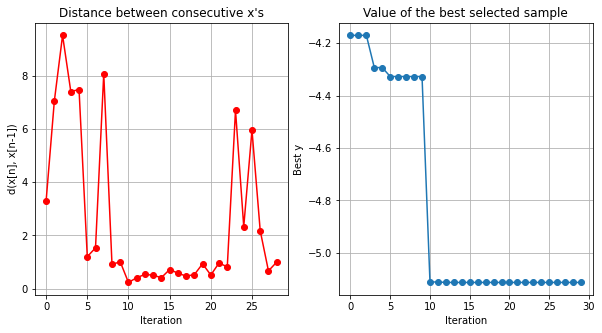

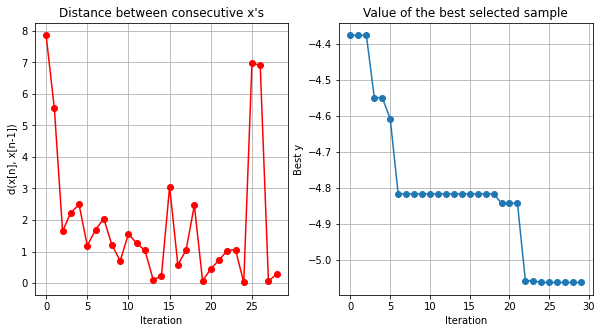

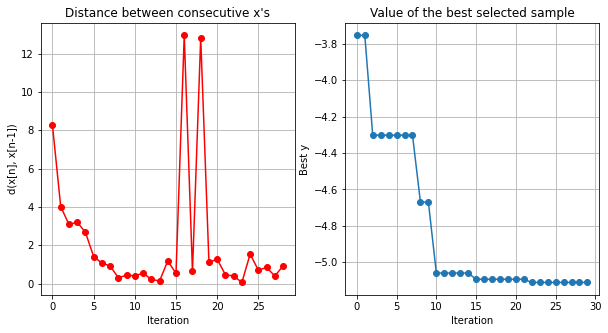

In [206]:

#initialize the hyper parameters bound for different kernels
kernel_types = ['Matern52', 'linear', 'RatQuad']
rqk_bounds = [{'name': 'variance', 'type': 'continuous', 'domain': (0.01, 10)},
          {'name': 'lengthscale', 'type': 'continuous', 'domain': (0.1, 10)},
          {'name': 'alpha', 'type': 'continuous', 'domain': (0.1, 10)},

          {'name': 'a', 'type': 'continuous', 'domain': (0.3,0.7)},
          {'name': 'mean_utility', 'type': 'continuous', 'domain': (0, 1)}]

bounds = [{'name': 'variance', 'type': 'continuous', 'domain': (0.01, 10)},
          {'name': 'lengthscale', 'type': 'continuous', 'domain': (0.1, 10)},
          {'name': 'a', 'type': 'continuous', 'domain': (0.3, 0.7)},
          {'name': 'mean_utility', 'type': 'continuous', 'domain': (0.01, 1)}]


best_gp_dict ={}
best_gp_dict_policy = {}
#for each kernel
for kernel_type in kernel_types:
#do baysian optimization
    
    if kernel_type == 'RatQuad':
        bounds_ = rqk_bounds
    else:
        bounds_ = bounds
    obj_func = lambda x: objective_function(x, kernel_type)
    bo = BayesianOptimization(f=obj_func,
                              domain=bounds_,
                              acquisition_type='EI',
                              acquisition_jitter=0.05,
                              num_cores=1)
    # Run the optimization
    bo.run_optimization(max_iter=25)
    # Get the best set of hyperparameters
    bo.plot_convergence()

    best_hyperparameters = bo.x_opt
    best_mean_policy_diff = bo.fx_opt
    best_gp_dict[kernel_type] = best_hyperparameters
    best_gp_dict_policy[kernel_type] = best_mean_policy_diff

In [207]:
best_gp_dict
#still edge

{'Matern52': array([2.30710327, 5.4691149 , 0.3       , 1.        ]),
 'linear': array([3.63100005, 5.35269625, 0.3       , 1.        ]),
 'RatQuad': array([ 5.37172184, 10.        ,  6.92873823,  0.3       ,  1.        ])}

In [208]:
best_gp_dict_policy

{'Matern52': -5.1131985939281295,
 'linear': -5.063109216654072,
 'RatQuad': -5.111630929359208}

In [209]:
best_kernel_type = min(best_gp_dict_policy, key=best_gp_dict_policy.get) 
best_param = best_gp_dict[best_kernel_type]
#get a dict of the parameters for the best kernel with its name as the key, and also the best mean policy diff and the kernel type
best_param_dict = dict(zip([b['name'] for b in bounds], best_param))
best_kernel = {"name": best_kernel_type, "best parameters": best_param_dict, "policy-diff": best_gp_dict_policy[best_kernel_type]}
best_kernel

{'name': 'Matern52',
 'best parameters': {'variance': 2.3071032731338565,
  'lengthscale': 5.469114897881382,
  'a': 0.3,
  'mean_utility': 1.0},
 'policy-diff': -5.1131985939281295}

In [210]:
file_path = 'best_kernel.json'

# Open the file in write mode and save the dictionary as JSON
with open(file_path, 'w') as json_file:
    json.dump(best_kernel, json_file)

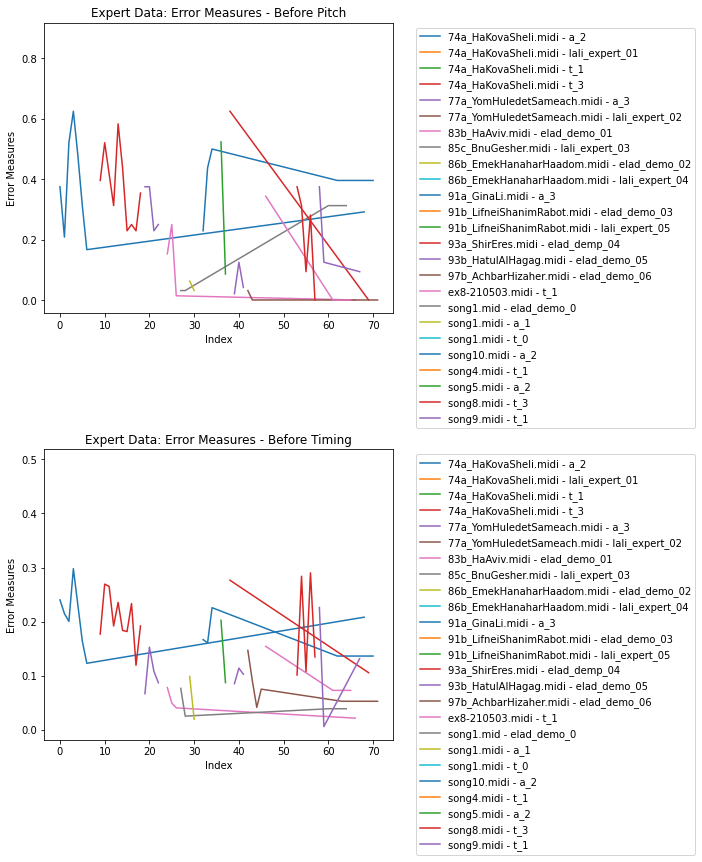

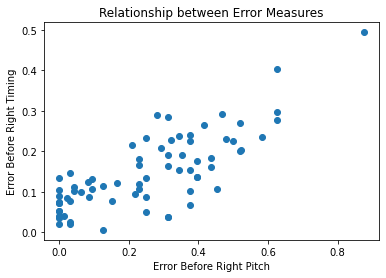

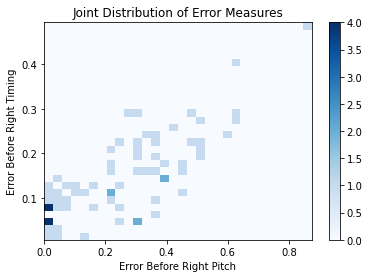

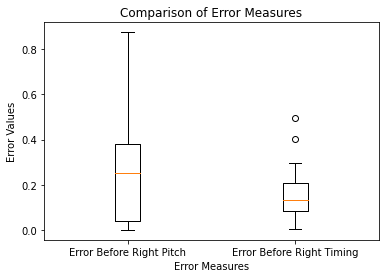

In [211]:
import seaborn as sns
import plotly.express as px
def plot_data(data):

    # Assuming your DataFrame is named 'expert_data'
    # Access the relevant columns
    error_before_right_pitch = expert_data['error_before_right_pitch']
    error_before_right_timing = expert_data['error_before_right_timing']
    midi_filename = expert_data['midi_filename']
    username = expert_data['username']

    # Group the data by 'midi_filename' and 'username'
    grouped_data = expert_data.groupby(['midi_filename', 'username'])

    # Plotting the grouped data for 'before pitch'
    fig, axes = plt.subplots(2, 1, figsize=(10, 12))

    # Plot 'before pitch'
    axes[0].set_title('Expert Data: Error Measures - Before Pitch')
    for group, data in grouped_data:
        axes[0].plot(data.index, data['error_before_right_pitch'], label=f"{group[0]} - {group[1]}")
    axes[0].set_xlabel('Index')
    axes[0].set_ylabel('Error Measures')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Plot 'before timing'
    axes[1].set_title('Expert Data: Error Measures - Before Timing')
    for group, data in grouped_data:
        axes[1].plot(data.index, data['error_before_right_timing'], label=f"{group[0]} - {group[1]}")
    axes[1].set_xlabel('Index')
    axes[1].set_ylabel('Error Measures')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()  # Ensures the plots don't overlap
    plt.show()

    #ploot scatter plot

    # Plotting the scatter plot
    plt.scatter(error_before_right_pitch, error_before_right_timing)
    plt.xlabel('Error Before Right Pitch')
    plt.ylabel('Error Before Right Timing')
    plt.title('Relationship between Error Measures')
    plt.show()

    # Creating the joint distribution plot using a 2D histogram
    plt.hist2d(error_before_right_pitch, error_before_right_timing, bins=30, cmap='Blues')
    plt.colorbar()
    plt.xlabel('Error Before Right Pitch')
    plt.ylabel('Error Before Right Timing')
    plt.title('Joint Distribution of Error Measures')
    plt.show()

#box plot
    data = [error_before_right_pitch, error_before_right_timing]

    # Create a box plot
    plt.boxplot(data, labels=['Error Before Right Pitch', 'Error Before Right Timing'])
    plt.xlabel('Error Measures')
    plt.ylabel('Error Values')
    plt.title('Comparison of Error Measures')
    plt.show()
    


plot_data(expert_data)

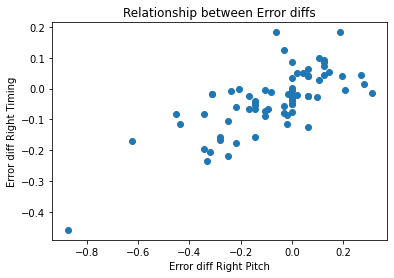

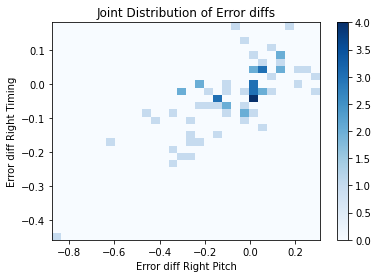

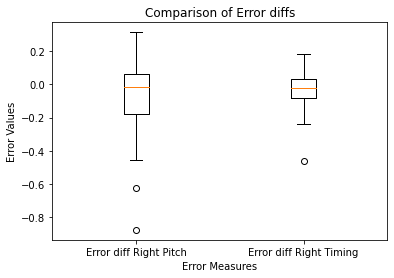

In [212]:
def plot_errors_diffs(data):
    error_post_timing = data['error_after_right_timing']
    error_post_pitch = data['error_after_right_pitch']
    error_pre_timing = data['error_before_right_timing']
    error_pre_pitch = data['error_before_right_pitch']
    diff_timing = error_post_timing - error_pre_timing
    diff_pitch  = error_post_pitch  - error_pre_pitch
    # Plotting the scatter plot
    plt.scatter(diff_pitch, diff_timing)
    plt.xlabel('Error diff Right Pitch')
    plt.ylabel('Error diff Right Timing')
    plt.title('Relationship between Error diffs')
    plt.show()

    # Creating the joint distribution plot using a 2D histogram
    plt.hist2d(diff_pitch, diff_timing, bins=30, cmap='Blues')
    plt.colorbar()
    plt.xlabel('Error diff Right Pitch')
    plt.ylabel('Error diff Right Timing')
    plt.title('Joint Distribution of Error diffs')
    plt.show()

    #box plot
    data = [diff_pitch, diff_timing]

    # Create a box plot
    plt.boxplot(data, labels=['Error diff Right Pitch', 'Error diff Right Timing'])
    plt.xlabel('Error Measures')
    plt.ylabel('Error Values')
    plt.title('Comparison of Error diffs')
    plt.show()

plot_errors_diffs(expert_data)


ADD OPTIMIZATION FOR UTILITY CALCULATION PARAMETERS
am not calculating left hand error(there is none in the expert data)